## Load Libraries

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import itertools
from collections import Counter

## Import Data

In [3]:
dataset = pd.read_csv('Market_Basket_Optimisation.csv', header = None)

In [4]:
transactions = []
for i in range(0, 7501):
    transaction = list()
    for j in range(0,20):
        if str(dataset.values[i,j]) != 'nan':
            transaction.append(str(dataset.values[i,j]))
    transactions.append(transaction)

## Print Summary and Histogram

In [38]:
totals = Counter(i for i in list(itertools.chain.from_iterable(transactions)))

for count in totals:
    totals[count] = totals[count] / len(transactions)

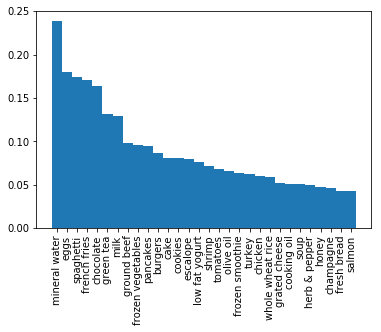

In [39]:
n = 30

labels, values = zip(*totals.most_common(n))

indexes = np.arange(len(labels))
width = 1

plt.bar(indexes[:n], values[:n], width)
plt.xticks(indexes[:n], labels, rotation='vertical')
plt.show()

## Training Apriori on the dataset

In [40]:
from apyori import apriori
rules = apriori(transactions, min_support = 0.004, min_confidence = 0.2, min_lift = 3, min_length = 2)

## Sort Data

In [41]:
def takeLift(elem):
    return elem.ordered_statistics[0].lift

In [42]:
results = list(rules)
results.sort(key=takeLift,reverse=True)

## Print Results

In [43]:
print('{:<20}  {:>5}  {:<20} {:<10} {:<10}'.format("Rule","","","Conf.","Lift"))
for result in results:
    print('{:<20}  {:>5}  {:<20} {:<10} {:<10}'.format(', '.join(result.ordered_statistics[0].items_base)[:20]," -> ",', '.join(result.ordered_statistics[0].items_add)[:20],"{0:.4f}".format(result.ordered_statistics[0].confidence),"{0:.4f}".format(result.ordered_statistics[0].lift)))
    print("") 

Rule                                              Conf.      Lift      
light cream             ->   chicken              0.2906     4.8440    

pasta                   ->   escalope             0.3729     4.7008    

pasta                   ->   shrimp               0.3220     4.5067    

eggs, ground beef       ->   herb & pepper        0.2067     4.1785    

whole wheat pasta       ->   olive oil            0.2715     4.1224    

spaghetti, herb & pe    ->   ground beef          0.3934     4.0044    

mineral water, herb     ->   ground beef          0.3906     3.9757    

tomato sauce            ->   ground beef          0.3774     3.8407    

mushroom cream sauce    ->   escalope             0.3007     3.7908    

mineral water, froze    ->   ground beef          0.3667     3.7318    

olive oil, tomatoes     ->   spaghetti            0.6111     3.5099    

spaghetti, frozen ve    ->   tomatoes             0.2392     3.4980    

mineral water, soup     ->   olive oil            0.